# DATA PREPROCESSING

### 1. TẢI CÁC THƯ VIÊN CẦN THIẾT

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import glob
import os
import ipaddress
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.utils import resample


In [2]:
# Set display options
pd.set_option('display.max_columns', None)


### 2. ĐỌC CÁC FILE DATASET VÀ XUẤT RA CSV

In [3]:
labeled_files = []
# Duyệt qua toàn bộ cây thư mục bắt đầu từ thư mục gốc
for root, dirs, files in os.walk('D:/opt/Malware-Project/BigDataset/IoTScenarios'):  # Thay đổi đường dẫn thư mục gốc nếu cần
    for file in files:
        # Kiểm tra xem tệp có tên "conn.log.labeled" không
        if file == 'conn.log.labeled':
            # Nếu có, thêm đường dẫn đầy đủ vào danh sách
            labeled_files.append(os.path.join(root, file))
labeled_files

['D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-Honeypot-Capture-4-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-Honeypot-Capture-5-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-Honeypot-Capture-7-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-1-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-17-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-20-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-21-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-3-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-33-1\\bro\\conn.log.labeled',
 'D:/opt/Malware-Project/BigDataset/IoTScenarios\\CTU-IoT-Malware-Capture-34-1

In [4]:
# Tạo list rỗng 
dfs = []

# Duyệt danh sách file
for labeled_file in labeled_files:    
    # Tên cột bắt đầu từ dòng 7, cột 2 trở đi
    data_columns = pd.read_csv(labeled_file, sep='\t', skiprows=6, nrows=1, header=None).iloc[0][1:]
    
    # Đọc dataset
    data_df = pd.read_csv(labeled_file, sep='\t', nrows=300000, comment="#", header=None)
    
    # Thiết lập tên cột
    data_df.columns = data_columns
    
    # Read each .labeled file into a dataframe and append to the list
    dfs.append(data_df)

# Kết hợp tốt cả các frame trong danh sách (bỏ qua các số index)
combined_df = pd.concat(dfs, ignore_index=True)

# Xuất file csv
combined_df.to_csv('D:/Project/IoT Detect/Combined Data/iot23_combined_final.csv', index=False)

In [5]:
combined_df
# Đoạn này là để thử nghiệm xem nó đọc được bao nhiêu bản ghi

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,1.540469e+09,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,48,SF,-,-,0,Dd,1,76,1,76,- benign -
1,1.540469e+09,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,0,S0,-,-,0,D,24,8208,0,0,- benign -
2,1.540469e+09,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,48,SF,-,-,0,Dd,1,76,1,76,- benign -
3,1.540470e+09,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,0,SF,-,-,0,ShAFf,5,212,3,144,- benign -
4,1.540470e+09,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,311,SF,-,-,0,Dd,1,62,1,339,- benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102760,1.532528e+09,Cvv8lt4TONTrbOePTa,192.168.100.111,38013,5.245.32.96,81,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty) Malicious PartOfAHorizontalPortScan
4102761,1.532528e+09,CPBybC3BF9D7jrprh,192.168.100.111,38678,152.156.68.165,81,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty) Malicious PartOfAHorizontalPortScan
4102762,1.532528e+09,CH4LFECO6d3kjHoi,192.168.100.111,62640,143.66.92.111,81,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty) Malicious PartOfAHorizontalPortScan
4102763,1.532528e+09,CB1wxR2kqz1WDfYehh,192.168.100.111,42032,151.106.49.113,81,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,(empty) Malicious PartOfAHorizontalPortScan


Một số vấn đề ở đây:
- Cột cuối cùng chứa nhiều dữ liệu cùng lúc, do phấu phân cách không khớp với file dataset (không phân cách bằng \t)
- Một số trường chứa '-' do trong dataset chúng không chứa giá trị nào

In [6]:
# Kiểm tra tổng thể 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102765 entries, 0 to 4102764
Data columns (total 21 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   ts                                       float64
 1   uid                                      object 
 2   id.orig_h                                object 
 3   id.orig_p                                int64  
 4   id.resp_h                                object 
 5   id.resp_p                                int64  
 6   proto                                    object 
 7   service                                  object 
 8   duration                                 object 
 9   orig_bytes                               object 
 10  resp_bytes                               object 
 11  conn_state                               object 
 12  local_orig                               object 
 13  local_resp                               object 
 14  missed_bytes      

- Bản tóm tắt cho thấy rằng không có giá trị thiếu (vì các trường đã bị đè giá trị '-'
- Một số đặc trưng có datatype bị xác định sai là object

### 3. SỬA CÁC CỘT BỊ NỐI LIỀN NHAU


Cột cuối cùng trong dataset chứa 3 giá trị riêng lẻ và cần tách ra thành 3 cột

In [21]:
# Chia thành 3 cột
tunnel_parents_column = combined_df.iloc[:,-1].apply(lambda x: x.split()[0])
sum_label_column = combined_df.iloc[:,-1].apply(lambda x: x.split()[1])
label_column = combined_df.iloc[:,-1].apply(lambda x: x.split()[1])

In [23]:
# Xóa cột cũ
combined_df.drop(["tunnel_parents   label   detailed-label"], axis=1, inplace=True)

In [24]:
# Thêm 3 cột mới
combined_df["tunnel_parents"] = tunnel_parents_column
combined_df["sum_label"] = label_column
combined_df["label"] = detailed_label_column

In [10]:
combined_df = combined_df.rename(columns={'tunnel_parents   label   detailed-label': 'label'})

In [11]:
# Kiểm tra lại 
combined_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.540469e+09,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687,216.239.35.4,123,udp,-,0.114184,48,48,SF,-,-,0,Dd,1,76,1,76,- benign -
1,1.540469e+09,CnaDAG3n5r8eiG4su2,192.168.1.132,1900,239.255.255.250,1900,udp,-,160.367579,7536,0,S0,-,-,0,D,24,8208,0,0,- benign -
2,1.540469e+09,CUrxU238nt0m6yTgKf,192.168.1.132,32893,216.239.35.8,123,udp,-,0.016986,48,48,SF,-,-,0,Dd,1,76,1,76,- benign -
3,1.540470e+09,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395,2.16.60.82,443,tcp,-,0.003497,0,0,SF,-,-,0,ShAFf,5,212,3,144,- benign -
4,1.540470e+09,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34,311,SF,-,-,0,Dd,1,62,1,339,- benign -


In [15]:
combined_df.loc[(combined_df.label == '-   Benign   -'), 'label'] = 'Benign'
combined_df.loc[(combined_df.label == '-   benign   -'), 'label'] = 'Benign'
combined_df.loc[(combined_df.label == '(empty)   Benign   -'), 'label'] = 'Benign'

combined_df.loc[(combined_df.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
combined_df.loc[(combined_df.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'

combined_df.loc[(combined_df.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
combined_df.loc[(combined_df.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
combined_df.loc[(combined_df.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru'

combined_df.loc[(combined_df.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'

combined_df.loc[(combined_df.label == '(empty)   Malicious   C&C'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '(empty)   Malicious   Attack'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   Attack'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   FileDownload'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C-Torii'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'Other'
combined_df.loc[(combined_df.label == '-   Malicious   C&C-Mirai'), 'label'] = 'Other'

In [4]:
# Kimể tra thông tin các mẫu dữ liệu
combined_df['label'].value_counts()

label
PartOfAHorizontalPortScan    2341686
Okiru                         787699
Benign                        550000
DDoS                          388595
Other                          22416
Name: count, dtype: int64

In [19]:
combined_df.to_csv('D:/Project/IoT Detect/Combined Data/iot23_combined_final_1.csv', index=False)

In [3]:
combined_df = pd.read_csv('D:/Project/IoT Detect/Combined Data/iot23_combined_final_1.csv')

C:\Users\Myozz\AppData\Local\Temp\ipykernel_3368\336656176.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('D:/Project/IoT Detect/Combined Data/iot23_combined_final_1.csv')


In [5]:
postscan_df = combined_df[combined_df['label'] == 'PartOfAHorizontalPortScan']
benign_df = combined_df[combined_df['label'] == 'Benign']
okiru_df = combined_df[combined_df['label'] == 'Okiru']
ddos_df = combined_df[combined_df['label'] == 'DDoS']
other_df = combined_df[combined_df['label'] == 'Other']


# Lấy mẫu random để giảm số lượng mẫu
benign_df = resample(benign_df, replace=False, n_samples=550000, random_state=123)
postscan_down = resample(postscan_df, replace=False, n_samples=700000, random_state=123)
okiru_down = resample(okiru_df, replace=False, n_samples=650000, random_state=123)
ddos_down = resample(ddos_df, replace=False, n_samples=380000, random_state=123)

# Kết hợp lại
label_df = combined_df[combined_df['label'] != 'Benign']
combined_df = pd.concat([benign_df, label_df])
label_df = combined_df[combined_df['label'] != 'PartOfAHorizontalPortScan']
combined_df = pd.concat([postscan_down, label_df])
label_df = combined_df[combined_df['label'] != 'Okiru']
combined_df = pd.concat([okiru_down, label_df])
label_df = combined_df[combined_df['label'] != 'DDoS']
combined_df = pd.concat([ddos_down, label_df])
combined_df = combined_df[combined_df['label'] != 'Other']

In [13]:
# Sửa lại một số nhãn 
#combined_df.loc[(combined_df.label == 'benign'), 'label'] = 'Benign'


In [5]:
combined_df.to_csv('D:/Project/IoT Detect/Combined Data/iot23_combined_final_fix.csv', index=False)

### 4. LOẠI BỎ CÁC CỘT TRÙNG LẶP/KHÔNG CẦN THIẾT

In [6]:
# Kiểm tra số lượng các giá trị duy nhất ở mỗi cột
combined_df.nunique().sort_values(ascending=False)

ts               2280000
uid              2280000
id.resp_h        1746833
id.orig_p          64756
duration           63149
id.resp_p          54248
id.orig_h           8470
orig_ip_bytes        935
resp_ip_bytes        633
orig_bytes           456
resp_bytes           451
history              144
orig_pkts            128
resp_pkts             89
conn_state            13
missed_bytes           8
service                6
label                  4
proto                  3
local_orig             1
local_resp             1
dtype: int64

In [7]:
# Thay các giá trị rỗng bằng null
combined_df.replace({'-':np.nan, "(empty)":np.nan}, inplace=True)

C:\Users\Myozz\AppData\Local\Temp\ipykernel_3368\2233836092.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df.replace({'-':np.nan, "(empty)":np.nan}, inplace=True)


In [8]:
# Sửa lại kiểu dữ liệu của một số cột
dtype_convert_dict = {
    "duration": float,
    "orig_bytes": float,
    "resp_bytes": float
}
combined_df = combined_df.astype(dtype_convert_dict)

In [9]:
# Loại bỏ các cột có giá trị trùng lặp, không có tác động trong việc xây dựng mô hình
combined_df.drop(columns=["ts","uid","local_resp","local_orig","id.resp_h","id.orig_h"], inplace=True)

In [13]:
combined_df.head()

,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
2227129,22568,52869,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,40,0,0,DDoS
2303715,59052,23,tcp,NaN,0.000002,0.0,0.0,S0,0,S,2,120,0,0,DDoS
278982,46942,23,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,DDoS
390366,17576,8081,tcp,NaN,0.000002,0.0,0.0,S0,0,S,2,80,0,0,DDoS
2349128,41676,23,tcp,NaN,0.000002,0.0,0.0,S0,0,S,2,120,0,0,DDoS


In [8]:
# Kiểm tra giá trị rỗng ở cột label
combined_df["label"].isna().sum()

0

In [7]:
# Kiểm tra số lượng mẫu dữ liệu
combined_df["label"].value_counts()

label
PartOfAHorizontalPortScan    700000
Okiru                        650000
Benign                       550000
DDoS                         380000
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

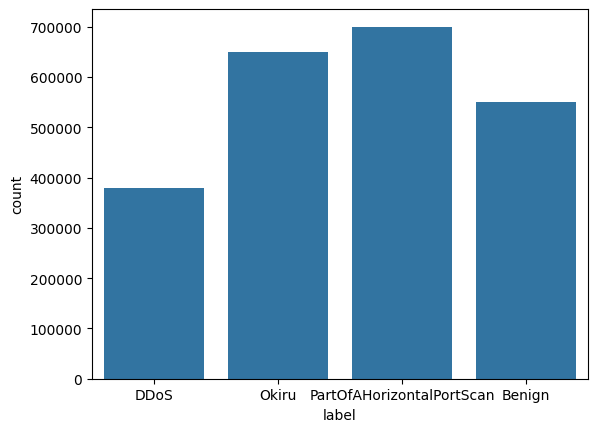

In [13]:
# Biểu đồ so sánh
sns.countplot(data=combined_df, x="label")

### 6. CHUYỂN DỮ LIỆU Ở MỘT SỐ CỘT SANG DỮ LIỆU SỐ

In [25]:
combined_df.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.132,58687,216.239.35.4,123,udp,NaN,0.114184,48.0,48.0,SF,0,Dd,1,76,1,76,Benign
1,192.168.1.132,1900,239.255.255.250,1900,udp,NaN,160.367579,7536.0,0.0,S0,0,D,24,8208,0,0,Benign
2,192.168.1.132,32893,216.239.35.8,123,udp,NaN,0.016986,48.0,48.0,SF,0,Dd,1,76,1,76,Benign
3,192.168.1.132,53395,2.16.60.82,443,tcp,NaN,0.003497,0.0,0.0,SF,0,ShAFf,5,212,3,144,Benign
4,192.168.1.132,52801,192.168.1.1,53,udp,dns,0.036724,34.0,311.0,SF,0,Dd,1,62,1,339,Benign


In [26]:
# Đoạn hàm mã hóa IP
'''def encode_ipv4(ip):
    try:
        # Cố gắng chuyển đổi thành IPv4
        return int(ipaddress.IPv4Address(ip))
    except ipaddress.AddressValueError:
        # Nếu không chuyển đổi được, báo hiệu để xóa hàng
        return None
'''

In [27]:
#combined_df["id.orig_h"] = combined_df["id.orig_h"].apply(encode_ipv4)
#combined_df["id.resp_h"] = combined_df["id.resp_h"].apply(encode_ipv4)

In [24]:
# Loại bỏ các hàng có giá trị None trong các cột 'id.orig_h' và 'id.resp_h'
#combined_df.dropna(subset=['id.orig_h'], inplace=True)
#combined_df.dropna(subset=['id.resp_h'], inplace=True)

In [28]:
# Kiểm tra lại
'''ip_columns = ["id.orig_h","id.resp_h"]
for c in ip_columns:
    print(f"IP col ({c}) values: {combined_df[c].unique()}")'''

IP col (id.orig_h) values: [3.23223591e+09 0.00000000e+00 3.23223603e+09 ... 3.10899020e+09
 4.10208297e+08 3.36663468e+09]
IP col (id.resp_h) values: [3.63955072e+09 4.02653183e+09 3.63955073e+09 ... 3.71974592e+09
 3.49297336e+09 6.77349427e+08]


In [26]:
# Sửa lại kiểu dữ liệu của 2 cột trên
#dtype_convert_dict = {
#    "id.orig_h": float,
#    "id.resp_h": float
#}
#combined_df = combined_df.astype(dtype_convert_dict)

In [14]:
# Khởi tạo mã hóa
target_le = LabelEncoder()

# Mã hóa các label
encoded_attribute = target_le.fit_transform(combined_df["label"])
combined_df["label"] = encoded_attribute

# Ánh xạ tên label gốc ứng với số sau khi mã hóa
dict(zip(target_le.classes_, target_le.transform(target_le.classes_)))


{'Benign': 0, 'DDoS': 1, 'Okiru': 2, 'PartOfAHorizontalPortScan': 3}

In [15]:
# Sửa lại kiểu dữ liệu của cột label
dtype_convert_dict = {
    "label": float
}
combined_df = combined_df.astype(dtype_convert_dict)

In [16]:
# Xác định các cột có giá trị thiếu
columns_with_missing = ["service","history"]

# Khởi tạo SimpleImputer, chỉ định rằng giá trị thiếu sẽ được thay thế bằng giá trị phổ biến nhất ở các cột tương ứng
imp = SimpleImputer(strategy="most_frequent")

# Thực hiện mã hóa
combined_df[columns_with_missing] = imp.fit_transform(combined_df[columns_with_missing])

combined_df.head()

,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
760026,18344,52869,tcp,dns,0.000002,0.0,0.0,S0,0,S,2,80,0,0,1.0
3479264,43793,62336,tcp,dns,NaN,NaN,NaN,OTH,0,C,0,0,0,0,1.0
788898,18344,52869,tcp,dns,0.000002,0.0,0.0,S0,0,S,2,80,0,0,1.0
736901,18344,52869,tcp,dns,0.000002,0.0,0.0,S0,0,S,2,80,0,0,1.0
3361642,39703,62336,tcp,dns,NaN,NaN,NaN,OTH,0,C,0,0,0,0,1.0


In [5]:
# Kiểm tra tính duy nhất của các giá trị ở các cột chỉ định (cột phân loại)
categorical_features = ["proto","service","conn_state","history"]
for c in categorical_features:
    print(f"Column ({c}) has ({combined_df[c].nunique()}) unique values.")

Column (proto) has (3) unique values.
Column (service) has (5) unique values.
Column (conn_state) has (13) unique values.
Column (history) has (15) unique values.


In [6]:
# Kiểm tra cột history vì có rất nhiều giá trị duy nhát
history_val_counts = combined_df["history"].value_counts()
history_val_counts

history
S           1834936
C            306569
D            117075
Dd            14173
Sr             3884
Other          1195
ShAdDaf         763
ShAdDafF        287
ShADadfF        207
ShAdDaFf        197
ShAFf           164
^c              157
ShADafF         148
ShAdfDr         136
F               109
Name: count, dtype: int64

In [19]:
# Ánh xạ các giá trị theo tấn số xuất hiện của chúng
history_freq_map = combined_df["history"].map(history_val_counts)

# Thay thế các gái trị ít xuất hiện ở cột history (dưới 100 lần) thành "Other"
combined_df["history"] = combined_df["history"].mask(history_freq_map < 100, "Other")

# Kiểm tra lại
combined_df["history"].value_counts()

history
S           1834936
C            306569
D            117075
Dd            14173
Sr             3884
Other          1195
ShAdDaf         763
ShAdDafF        287
ShADadfF        207
ShAdDaFf        197
ShAFf           164
^c              157
ShADafF         148
ShAdfDr         136
F               109
Name: count, dtype: int64

In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280000 entries, 760026 to 277869
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_p      int64  
 1   id.resp_p      int64  
 2   proto          object 
 3   service        object 
 4   duration       float64
 5   orig_bytes     float64
 6   resp_bytes     float64
 7   conn_state     object 
 8   missed_bytes   int64  
 9   history        object 
 10  orig_pkts      int64  
 11  orig_ip_bytes  int64  
 12  resp_pkts      int64  
 13  resp_ip_bytes  int64  
 14  label          float64
dtypes: float64(4), int64(7), object(4)
memory usage: 278.3+ MB


### 7. CHUYỂN ĐỔI CÁC NHÃN ĐA LỚP THÀNH CÁC NHÃN NHỊ PHÂN

OneHot Encoding là một kỹ thuật mã hóa dữ liệu phân loại, trong đó mỗi giá trị phân loại được biểu diễn bằng một vector nhị phân (chỉ chứa giá trị 0 hoặc 1). Mỗi giá trị duy nhất trong một cột phân loại sẽ có một cột riêng trong ma trận kết quả, và cột đó sẽ có giá trị 1 tại các hàng tương ứng với giá trị đó, và 0 ở các hàng còn lại.

In [7]:
# Khởi tạo ONeHotEncoder
ohe = OneHotEncoder()

# Tiến hành mã hóa
encoded_features = ohe.fit_transform(combined_df[categorical_features])

# Chuyển đổi thành một dataframe (vì dữ liệu trả về của encode_features ở dạng ma trận)
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Kiểm tra kết quả
encoded_features_df

,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_ssh,service_ssl,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,history_C,history_D,history_Dd,history_F,history_Other,history_S,history_ShADadfF,history_ShADafF,history_ShAFf,history_ShAdDaFf,history_ShAdDaf,history_ShAdDafF,history_ShAdfDr,history_Sr,history_^c
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279995,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2279998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
combined_df = pd.read_csv('D:/Project/IoT Detect/Combined Data/iot23_processed_fix.csv')

In [8]:
# Bợp nhất với dataframe chính và bỏ các cột gốc
combined_df = pd.concat([combined_df, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [9]:
combined_df.head()

,Unnamed: 0,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_ssh,service_ssl,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,history_C,history_D,history_Dd,history_F,history_Other,history_S,history_ShADadfF,history_ShADafF,history_ShAFf,history_ShAdDaFf,history_ShAdDaf,history_ShAdDafF,history_ShAdfDr,history_Sr,history_^c
0,760026,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3479264,0.668238,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788898,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,736901,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3361642,0.605829,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. XỬ LÝ GIÁ TRỊ THIẾU

In [22]:
combined_df.isnull().sum().sort_values(ascending=False)

duration         1618621
orig_bytes       1618621
resp_bytes       1618621
id.orig_p              0
id.resp_p              0
proto                  0
service                0
conn_state             0
missed_bytes           0
history                0
orig_pkts              0
orig_ip_bytes          0
resp_pkts              0
resp_ip_bytes          0
label                  0
dtype: int64

In [23]:
# Thay thế các giá trị thiếu ở 3 cột được chỉ định bằng giá trị trung bình ở các cột tương ứng
columns = ['orig_bytes','resp_bytes','duration']
for col in columns:
    combined_df[col] = combined_df[col].replace(np.nan, combined_df[col].mean())




In [24]:
combined_df.head()

,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
760026,18344,52869,tcp,dns,0.000002,0.000000,0.000000,S0,0,S,2,80,0,0,1.0
3479264,43793,62336,tcp,dns,1.702016,5958.139312,544.144326,OTH,0,C,0,0,0,0,1.0
788898,18344,52869,tcp,dns,0.000002,0.000000,0.000000,S0,0,S,2,80,0,0,1.0
736901,18344,52869,tcp,dns,0.000002,0.000000,0.000000,S0,0,S,2,80,0,0,1.0
3361642,39703,62336,tcp,dns,1.702016,5958.139312,544.144326,OTH,0,C,0,0,0,0,1.0


In [25]:
# Kiểm tra lại 
combined_df.isnull().sum().sort_values(ascending=False)

id.orig_p        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

### 9. SCALING CÁC THUỘC TÍNH SỐ

Với mục tiêu là so sánh các mô hình phân loại, việc scaling giúp đảm bảo rằng tất cả thuộc tính đều có ảnh hưởng tương đương nhau trong quá trình training mô hình. Điều này đặc biệt cần thiết khi sử dụng các mô hình dựa trên khoảng cách (distanced_based) như KNN vì khoảng cách giữa các điểm dữ liệu có thể bị ảnh hưởng nhiều bởi sự khác biệt về thang đo của các thuộc tính.

Các thông số trong bảng thống kê:
- count: Số lượng giá trị không bị thiếu (non-null) trong mỗi cột
- mean: Giá trị trung bình của mỗi cột
- std: Độ lệch chuẩn (mức độ phân tán của các giá trị xung quanh giá trị trung bình)
- min: Giá trị thấp nhất
- 25/50/75%: 25/50/75% Các giá trị trong cột nhỏ hơn giá trị này
- max: Giá trị lớn nhất

In [26]:
# Kiểm tra thống kê của các thuộc tính số (min, max, trung bình,...)
numerical_features = ["id.orig_p","id.resp_p","duration","orig_bytes","resp_bytes","missed_bytes","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes"]
pd.set_option("display.float", "{:.2f}".format)
combined_df[numerical_features].describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00
mean,34539.44,24572.68,1.70,5958.14,544.14,0.04,113.17,4925.54,0.14,165.33
std,17724.77,23718.62,74.91,1364964.20,223015.22,12.73,57554.85,2268160.27,158.80,231699.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18344.00,23.00,1.70,0.00,0.00,0.00,1.00,40.00,0.00,0.00
50%,36097.00,37215.00,1.70,5958.14,544.14,0.00,1.00,40.00,0.00,0.00
75%,47220.00,37215.00,1.70,5958.14,544.14,0.00,2.00,80.00,0.00,0.00
max,65535.00,65535.00,78840.33,1744830458.00,336516351.00,7363.00,66027354.00,1914793266.00,239484.00,349618679.00


Vì hầu hết các thuộc tính không có phân phối chuẩn (normal distribution), đoạn mã sử dụng MinMaxScaler để chuẩn hóa dữ liệu. MinMaxScaler chuyển đổi các giá trị về phạm vi `[0, 1]` bằng cách sử dụng công thức sau:
```X_scaled = (X - X.min()) / (X.max() - X.min())```

In [27]:
# Khởi tạo và ứng dụng MinMaxScaler
min_max_scaler = MinMaxScaler()
combined_df[numerical_features] = min_max_scaler.fit_transform(combined_df[numerical_features])

In [28]:
# Kiểm tra lại thống kê
combined_df[numerical_features].describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00,2280000.00
mean,0.53,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.27,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.55,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 10. LỮ TRỮ DATASET ĐÃ XỬ LÝ

In [10]:
combined_df.head()

,Unnamed: 0,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_ssh,service_ssl,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,history_C,history_D,history_Dd,history_F,history_Other,history_S,history_ShADadfF,history_ShADafF,history_ShAFf,history_ShAdDaFf,history_ShAdDaf,history_ShAdDafF,history_ShAdfDr,history_Sr,history_^c
0,760026,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3479264,0.668238,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788898,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,736901,0.279911,0.806729,1.268386e-11,0.000000,0.000000,0.0,3.029048e-08,4.177997e-08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3361642,0.605829,0.951186,2.158813e-05,0.000003,0.000002,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280000 entries, 0 to 2279999
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   id.orig_p          float64
 2   id.resp_p          float64
 3   duration           float64
 4   orig_bytes         float64
 5   resp_bytes         float64
 6   missed_bytes       float64
 7   orig_pkts          float64
 8   orig_ip_bytes      float64
 9   resp_pkts          float64
 10  resp_ip_bytes      float64
 11  label              float64
 12  proto_icmp         float64
 13  proto_tcp          float64
 14  proto_udp          float64
 15  service_dhcp       float64
 16  service_dns        float64
 17  service_http       float64
 18  service_ssh        float64
 19  service_ssl        float64
 20  conn_state_OTH     float64
 21  conn_state_REJ     float64
 22  conn_state_RSTO    float64
 23  conn_state_RSTOS0  float64
 24  conn_state_RSTR    float64
 25  conn_state_RSTRH  

In [12]:
combined_df.drop(columns=["Unnamed: 0"], inplace=True)

In [13]:
combined_df.to_csv('D:/Project\IoT Detect/Combined Data/iot23_processed_fix_2.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Myozz\AppData\Local\Temp\ipykernel_5748\2599278942.py:1: SyntaxWarning: invalid escape sequence '\I'
  combined_df.to_csv('D:/Project\IoT Detect/Combined Data/iot23_processed_fix_2.csv', index=False)
